In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 데이터 로드
file_path = 'dsets/group_pro/group_5565.csv'
data = pd.read_csv(file_path)

# 타임스탬프 컬럼을 datetime 형식으로 변환
data['tm'] = pd.to_datetime(data['tm'])

# 년, 월, 일 컬럼 추가
data['year'] = data['tm'].dt.year
data['month'] = data['tm'].dt.month
data['day'] = data['tm'].dt.day

data = data.drop(columns=['tm'])

print(data.head(5))

   Index   num  hh24   n  stn  sum_qctr  sum_load  n_mean_load  nph_ta  \
0   8761  5565     1  58  184     42250   4468.72    79.776051     2.3   
1   8762  5565     2  58  184     42250   4101.00    79.776051     2.5   
2   8763  5565     3  58  184     42250   3724.60    79.776051     2.8   
3   8764  5565     4  58  184     42250   3484.40    79.776051     2.8   
4   8765  5565     5  58  184     42250   3409.12    79.776051     3.0   

   nph_hm  nph_ws_10m  nph_rn_60m  nph_ta_chi  weekday  week_name   elec  \
0    65.8         1.7         0.0        -0.3        2          0  96.58   
1    69.7         1.8         0.0        -0.2        2          0  88.63   
2    69.5         2.3         0.0        -0.2        2          0  80.50   
3    66.0         1.6         0.0         0.5        2          0  75.31   
4    66.1         1.6         0.0         0.5        2          0  73.68   

   year  month  day  
0  2020      1    1  
1  2020      1    1  
2  2020      1    1  
3  2020   

In [2]:
# 필요한 특성 선택
features = ['num', 'year', 'month', 'day', 'hh24', 'weekday','week_name', 'nph_ta', 'nph_hm', 'nph_rn_60m', 'nph_ta_chi']
target = 'elec'

# 입력 데이터와 타겟 데이터 분리
input_data = data[features]
target_data = data[[target]]

# 데이터 확인
print(input_data.head())
print(target_data.head())

    num  year  month  day  hh24  weekday  week_name  nph_ta  nph_hm  \
0  5565  2020      1    1     1        2          0     2.3    65.8   
1  5565  2020      1    1     2        2          0     2.5    69.7   
2  5565  2020      1    1     3        2          0     2.8    69.5   
3  5565  2020      1    1     4        2          0     2.8    66.0   
4  5565  2020      1    1     5        2          0     3.0    66.1   

   nph_rn_60m  nph_ta_chi  
0         0.0        -0.3  
1         0.0        -0.2  
2         0.0        -0.2  
3         0.0         0.5  
4         0.0         0.5  
    elec
0  96.58
1  88.63
2  80.50
3  75.31
4  73.68


https://dacon.io/competitions/official/235736/codeshare/2743?page=1&dtype=recent

불쾌지수, 냉방도일 추가

In [32]:
# input_data['THI'] = 9/5*input_data['nph_ta'] - 0.55*(1-input_data['nph_hm']/100)*(9/5*input_data['nph_hm']-26)+32

# def CDH(xs):
#     ys = []
#     for i in range(len(xs)):
#         if i < 11:
#             ys.append(np.sum(xs[:(i+1)]-26))
#         else:
#             ys.append(np.sum(xs[(i-11):(i+1)]-26))
#     return np.array(ys)

# cdhs = np.array([])
# for num in range(len(input_data)):
#     nph_ta = input_data[input_data['num'] == num]
#     cdh = CDH(nph_ta['nph_ta'].values)
#     cdhs = np.concatenate([cdhs, cdh])
# input_data['CDH'] = cdhs

# print(input_data.head(3))

C:\Users\ICS_Lab\AppData\Local\Temp\ipykernel_7620\3331459202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_data['THI'] = 9/5*input_data['nph_ta'] - 0.55*(1-input_data['nph_hm']/100)*(9/5*input_data['nph_hm']-26)+32


    num  year  month  day  hh24  weekday  week_name  nph_ta  nph_hm  \
0  5565  2020      1    1     1        2          0     2.3    65.8   
1  5565  2020      1    1     2        2          0     2.5    69.7   
2  5565  2020      1    1     3        2          0     2.8    69.5   

   nph_rn_60m  nph_ta_chi        THI   CDH  
0         0.0        -0.3  18.752036 -23.7  
1         0.0        -0.2  19.924991 -47.2  
2         0.0        -0.2  20.415975 -70.4  


C:\Users\ICS_Lab\AppData\Local\Temp\ipykernel_7620\3331459202.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_data['CDH'] = cdhs


In [3]:
print(input_data.shape)
print(target_data.shape)

(26304, 11)
(26304, 1)


##### 스케일링

In [6]:
# 불쾌지수, 냉방도일 추가 ver. : 여름에만 유효?
# train_feature = ['nph_ta', 'nph_hm', 'nph_rn_60m', 'nph_ta_chi', 'THI', 'CDH']
# input_data = input_data[train_feature]
# print(input_data.head(3))

train_feature = ['month', 'hh24', 'week_name', 'nph_ta', 'nph_hm', 'nph_rn_60m', 'nph_ta_chi']
input_data = input_data[train_feature]
print(input_data.head(3))



input_scaler = MinMaxScaler()
target_scaler = MinMaxScaler()

scaled_input_data = input_scaler.fit_transform(input_data)
scaled_target_data = target_scaler.fit_transform(target_data)

scaled_input_data = pd.DataFrame(scaled_input_data, columns=input_data.columns)
scaled_target_data = pd.DataFrame(scaled_target_data, columns=target_data.columns)

print(scaled_input_data.head(3))
print(scaled_target_data.head(3))

print(scaled_input_data.shape)
print(scaled_target_data.shape)

   month  hh24  week_name  nph_ta  nph_hm  nph_rn_60m  nph_ta_chi
0      1     1          0     2.3    65.8         0.0        -0.3
1      1     2          0     2.5    69.7         0.0        -0.2
2      1     3          0     2.8    69.5         0.0        -0.2
   month      hh24  week_name    nph_ta    nph_hm  nph_rn_60m  nph_ta_chi
0    0.0  0.000000        0.0  0.129288  0.581998         0.0    0.199557
1    0.0  0.043478        0.0  0.134565  0.630086         0.0    0.201774
2    0.0  0.086957        0.0  0.142480  0.627620         0.0    0.201774
       elec
0  0.230114
1  0.178451
2  0.125617
(26304, 7)
(26304, 1)


##### 시퀀스 생성 : 슬라이딩 윈도우 방식 선택

일주일 단위 시퀀스 24 * 7 : 데이터 형태 (n, 24*7, feature_dim)

return_sequences = True로 설정

In [110]:
def create_weekly_sequences_slide(input_data, target_data, sequence_length=7*24, step=24):
    input_sequences = []
    target_sequences = []

    # 슬라이딩 윈도우 방식으로 시퀀스 생성
    for start_idx in range(0, len(input_data) - sequence_length + 1, step):
        end_idx = start_idx + sequence_length
        input_seq = input_data[start_idx:end_idx]
        target_seq = target_data[start_idx:end_idx]
        
        # 시퀀스의 길이가 정확히 168인 경우만 추가
        if len(input_seq) == sequence_length:
            input_sequences.append(input_seq)
            target_sequences.append(target_seq)

    return np.array(input_sequences), np.array(target_sequences)

# 예시 호출
weekly_input_sequences, weekly_target_sequences = create_weekly_sequences_slide(scaled_input_data, scaled_target_data)

print(weekly_input_sequences.shape)
print(weekly_target_sequences.shape)

(1090, 168, 7)
(1090, 168, 1)


In [118]:
def create_weekly_sequences(input_data, target_data, sequence_length=7*24):
    input_sequences = []
    target_sequences = []

    # 슬라이딩 윈도우 방식으로 시퀀스 생성
    for start_idx in range(0, len(input_data) - sequence_length + 1, sequence_length):
        end_idx = start_idx + sequence_length
        input_seq = input_data[start_idx:end_idx]
        target_seq = target_data[start_idx:end_idx]
        
        # 시퀀스의 길이가 정확히 168인 경우만 추가
        if len(input_seq) == sequence_length:
            input_sequences.append(input_seq)
            target_sequences.append(target_seq)

    return np.array(input_sequences), np.array(target_sequences)

# 예시 호출
weekly_input_sequences, weekly_target_sequences = create_weekly_sequences(scaled_input_data, scaled_target_data)

print(weekly_input_sequences.shape)
print(weekly_target_sequences.shape)

(156, 168, 7)
(156, 168, 1)


### Model
LSTM : Long Short-Term Memory

In [120]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

layer_1 = 64
layer_2 = 32
# LSTM 모델 구축
model = Sequential()
model.add(LSTM(layer_1, activation='relu', return_sequences=True, input_shape=weekly_input_sequences[0].shape))  # 입력 시퀀스 형태에 맞게 설정
model.add(LSTM(layer_2, activation='relu', return_sequences=True))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# 모델 구조 요약 출력
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 168, 64)           18432     
                                                                 
 lstm_29 (LSTM)              (None, 168, 32)           12416     
                                                                 
 dense_14 (Dense)            (None, 168, 1)            33        
                                                                 
Total params: 30,881
Trainable params: 30,881
Non-trainable params: 0
_________________________________________________________________


Training data shape: (124, 168, 7) (124, 168, 1)
Testing data shape: (32, 168, 7) (32, 168, 1)
Epoch 1/50
3/3 [==============================] - 3s 374ms/step - loss: 0.1287 - val_loss: 0.0429
Epoch 2/50
3/3 [==============================] - 1s 156ms/step - loss: 0.0662 - val_loss: 0.0198
Epoch 3/50
3/3 [==============================] - 0s 155ms/step - loss: 0.0336 - val_loss: 0.0141
Epoch 4/50
3/3 [==============================] - 0s 153ms/step - loss: 0.0237 - val_loss: 0.0226
Epoch 5/50
3/3 [==============================] - 1s 162ms/step - loss: 0.0274 - val_loss: 0.0202
Epoch 6/50
3/3 [==============================] - 1s 155ms/step - loss: 0.0238 - val_loss: 0.0141
Epoch 7/50
3/3 [==============================] - 0s 155ms/step - loss: 0.0205 - val_loss: 0.0119
Epoch 8/50
3/3 [==============================] - 0s 151ms/step - loss: 0.0202 - val_loss: 0.0117
Epoch 9/50
3/3 [==============================] - 0s 157ms/step - loss: 0.0204 - val_loss: 0.0116
Epoch 10/50
3/3 [======

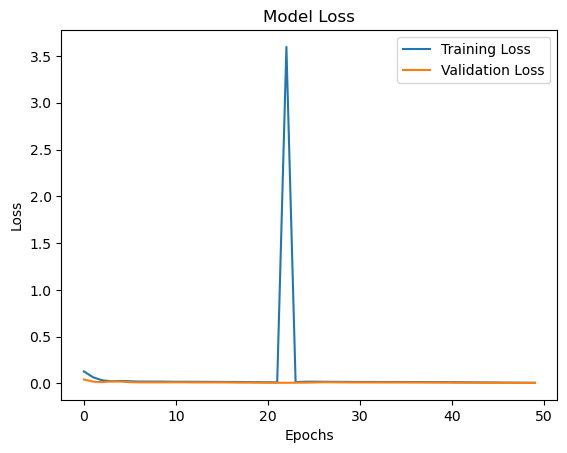

In [121]:
X_train, X_test, y_train, y_test = train_test_split(weekly_input_sequences, weekly_target_sequences, shuffle=False, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

epochs = 50
batch_size = 40 # 24*7로 나누면 1096일 정도
# 한 에폭당 한달을 학습시키려면 39-40 정도 : (4, 24*7, f_dim)씩 학습

# 모델 학습
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

# 모델 저장
model_path = 'test_5565_more_lstm.h5'
model.save(model_path)

# 손실 값 시각화
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 314ms/step


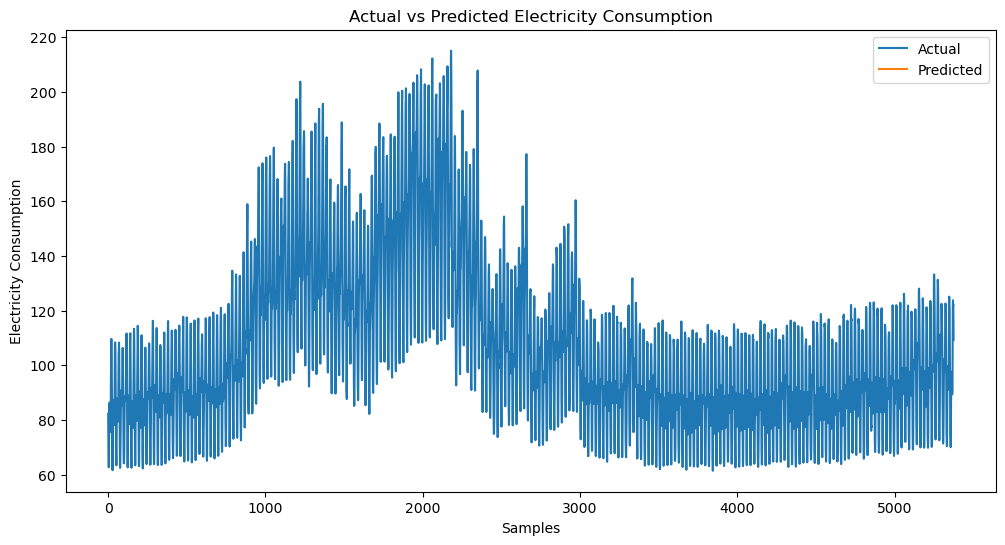

ValueError: Input contains NaN.

In [116]:
from keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# 모델 로드
model_path = 'test_5565_more_lstm.h5'
model = load_model(model_path)


# 테스트 데이터 예측
y_pred = model.predict(X_test)

# 예측 결과 역스케일링
y_pred_reshaped = y_pred.reshape(-1, 1)
y_test_reshaped = y_test.reshape(-1, 1)

y_pred_inverse = target_scaler.inverse_transform(y_pred_reshaped).reshape(y_pred.shape)
y_test_inverse = target_scaler.inverse_transform(y_test_reshaped).reshape(y_test.shape)

# 예측 결과를 평탄화
y_test_flat = y_test_inverse.flatten()
y_pred_flat = y_pred_inverse.flatten()

# 예측 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(y_test_flat, label='Actual')
plt.plot(y_pred_flat, label='Predicted')
plt.title('Actual vs Predicted Electricity Consumption')
plt.xlabel('Samples')
plt.ylabel('Electricity Consumption')
plt.legend()
plt.show()

# 성능 평가
mse = mean_squared_error(y_test_flat, y_pred_flat)
print(f'Mean Squared Error: {mse}')

In [ ]:
# 한달정도만 테스트하기

# 봄, 여름, 가을, 겨울 모델 구분할 게 아니면 불쾌지수, 냉방도일 제거 ?

1년 모델 result : Mean Squared Error: 48.32118569120681

epochs = 50

batch_size = 16

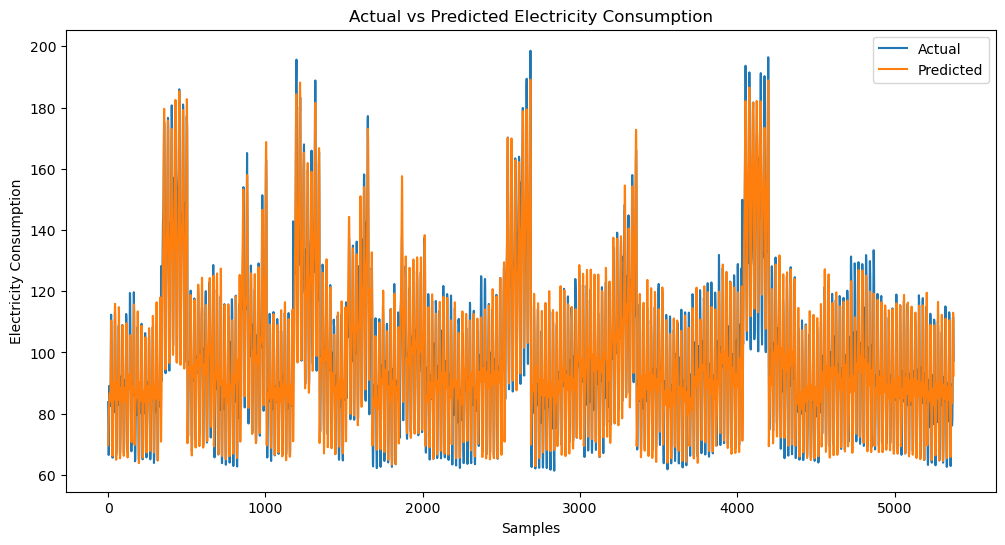

epochs = 50

batch_size = 10

Mean Squared Error: 37.57241973866179

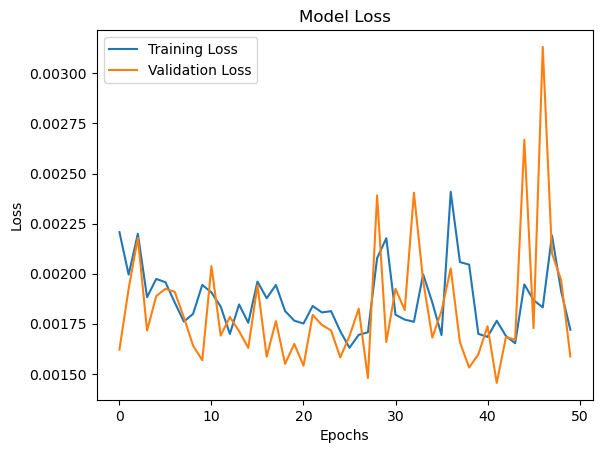
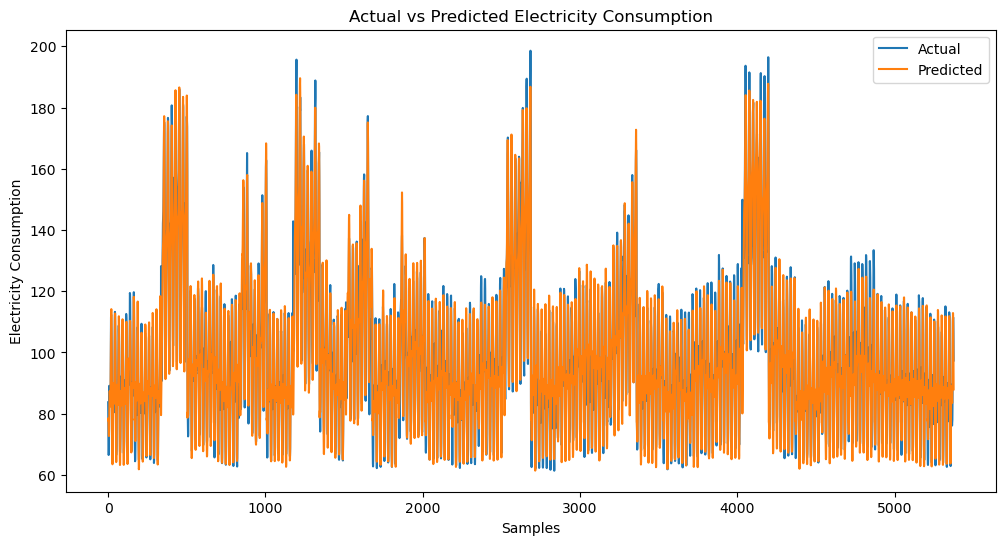

### Model : Re

##### Daily seq

In [ ]:
# 시퀀스 일단위 생성 (Daily)

from sklearn.model_selection import train_test_split

seq_lenght = 24

def create_daily_sequences(input_data, target_data, seq_length=seq_lenght):
    x = []
    y = []
    for i in range(len(input_data) - seq_length):
        x.append(input_data.iloc[i:i + seq_length].values)
        y.append(target_data.iloc[i + seq_length - 1].values)  # Target is the next time step's target value
    return np.array(x), np.array(y)

# Assuming 'scaled_input_data' and 'scaled_target_data' are the preprocessed DataFrames
X_daily, y_daily = create_daily_sequences(scaled_input_data, scaled_target_data)

# Display the shape of the created sequences
print(X_daily.shape, y_daily.shape)


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_daily, y_daily, test_size=0.2, random_state=42)

print(X_test.shape, y_test.shape)

##### Weekly seq

In [14]:
import numpy as np
import pandas as pd

def create_weekly_sequences(input_data, target_data, seq_length=24*7):
    x = []
    y = []
    for i in range(len(input_data) - seq_length):
        x.append(input_data.iloc[i:i + seq_length].values)
        y.append(target_data.iloc[i + seq_length - 1].values)  # Target is the next time step's target value
    return np.array(x), np.array(y)

# Assuming 'scaled_input_data' and 'scaled_target_data' are the preprocessed DataFrames
X_weekly, y_weekly = create_weekly_sequences(scaled_input_data, scaled_target_data)

# Display the shape of the created sequences
print(X_weekly.shape, y_weekly.shape)

X_train, X_test, y_train, y_test = train_test_split(X_weekly, y_weekly, test_size=0.2, random_state=42)

print(X_test.shape, y_test.shape)

(26136, 168, 7) (26136, 1)
(5228, 168, 7) (5228, 1)


##### Bidirectional LSTM

Epoch 1/100
523/523 [==============================] - 29s 50ms/step - loss: 0.0120 - val_loss: 0.0030
Epoch 2/100
523/523 [==============================] - 25s 47ms/step - loss: 0.0039 - val_loss: 0.0020
Epoch 3/100
523/523 [==============================] - 25s 47ms/step - loss: 0.0027 - val_loss: 0.0018
Epoch 4/100
523/523 [==============================] - 25s 47ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 5/100
523/523 [==============================] - 25s 47ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 6/100
523/523 [==============================] - 25s 47ms/step - loss: 0.0016 - val_loss: 0.0011
Epoch 7/100
523/523 [==============================] - 25s 48ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 8/100
523/523 [==============================] - 25s 48ms/step - loss: 0.0015 - val_loss: 9.5687e-04
Epoch 9/100
523/523 [==============================] - 25s 48ms/step - loss: 0.0014 - val_loss: 9.3854e-04
Epoch 10/100
523/523 [==============================] - 25s 48ms/

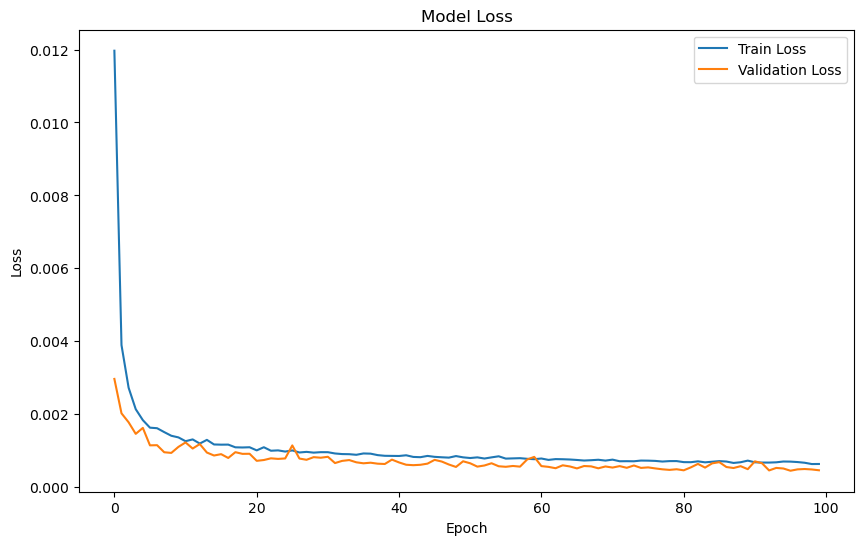

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


layer_1 = 50
lr = 0.001
epochs = 100
batch_size = 40
drop = 0.3
feature_dim = 7

# Define the LSTM model
def create_model(input_shape):
    model = Sequential()
    model.add(Bidirectional(LSTM(units=layer_1, return_sequences=False, input_shape=input_shape)))
    model.add(Dropout(drop))
    model.add(Dense(units=1))
    return model

# Compile the model
model = create_model((seq_lenght, feature_dim))
model.compile(optimizer=Adam(learning_rate=lr), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Save the model
model_path = 'year_5565_weekly_bid.h5'
model.save(model_path)

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()


164/164 [==============================] - 4s 19ms/step
(5228, 1)
Test MSE: 10.953918931978244


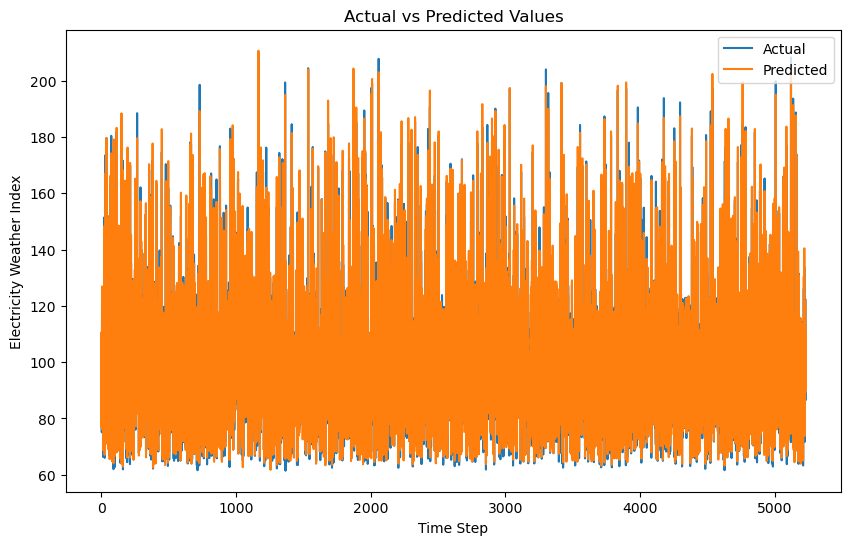

In [16]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_test_rescaled = target_scaler.inverse_transform(y_test)
y_pred_rescaled = target_scaler.inverse_transform(y_pred)

print(y_pred.shape)

# Calculate MSE
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
print(f'Test MSE: {mse}')

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label='Actual')
plt.plot(y_pred_rescaled, label='Predicted')
plt.title('Actual vs Predicted Values')
plt.xlabel('Time Step')
plt.ylabel('Electricity Weather Index')
plt.legend(loc='upper right')
plt.show()

layer_1 = 50
lr = 0.001
epochs = 100
batch_size = 40
drop = 0.3
feature_dim = 7

Test MSE: 17.143542493310118

bidirectional LSTM / Daily sequences / Years data (Full) / 12m ?

layer_1 = 50
lr = 0.001
epochs = 100
batch_size = 40
drop = 0.3
feature_dim = 7

Test MSE: 10.953918931978244

bidirectional LSTM / Weekly sequences / Years data (Full) / 42m